# Multi-agent CartPole solver using actor-critic (AC) agents with eQMARL coupling

In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# import warnings
# warnings.filterwarnings('error', message=r".*complex128.*")
# warnings.simplefilter('module')

# from silence_tensorflow import silence_tensorflow
# silence_tensorflow()

import eqmarl
import matplotlib.pyplot as plt
import gymnasium as gym
from tensorflow import keras
import tensorflow as tf

In [20]:
# # Disable GPUs.
# tf.config.set_visible_devices([], 'GPU')

# List any available GPUs.
tf.config.list_physical_devices('GPU')

[]

In [21]:
# Quantum actor.
n_layers = 5
n_actions = 2
n_agents = 2
model_actor = eqmarl.generate_model_CartPole_actor_quantum_partite(
    n_agents=n_agents,
    n_layers=n_layers,
    squash_activation='arctan',
    name='actor-quantum-eqmarl',
    )


# optimizer_actor = keras.optimizers.Adam(learning_rate=0.1)
optimizer_actor = [
    tf.keras.optimizers.Adam(learning_rate=0.01, amsgrad=True),
    tf.keras.optimizers.Adam(learning_rate=0.1, amsgrad=True),
    tf.keras.optimizers.Adam(learning_rate=0.1, amsgrad=True),
]

model_actor.build((None, n_agents, 4))
model_actor.summary()

Model: "actor-quantum-eqmarl"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-preprocess (Sequentia  (None, 2, 4, 1)          0         
 l)                                                              
                                                                 
 HybridPartiteVariationalEnc  (None, 4)                184       
 odingPQC (HybridPartiteVari                                     
 ationalEncodingPQC)                                             
                                                                 
 observables-policy (Sequent  (None, 4)                4         
 ial)                                                            
                                                                 
Total params: 188
Trainable params: 188
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Classical critic.
model_critic = eqmarl.generate_model_critic_classical(
    units=[128, 64, 32],
    name=f"critic-classical",
    )

optimizer_critic = keras.optimizers.Adam(learning_rate=0.001)

model_critic.build((None, n_agents, 4))
model_critic.summary()

Model: "critic-classical"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 8)                 0         
                                                                 
 dense_6 (Dense)             (None, 128)               1152      
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 v (Dense)                   (None, 1)                 33        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


## Training

In [23]:
gamma = 0.99
agent = eqmarl.agents.eQMARL_AC(
    model_actor=model_actor,
    model_critic=model_critic,
    optimizer_actor=optimizer_actor,
    optimizer_critic=optimizer_critic,
    n_actions=n_actions,
    n_agents=n_agents,
    gamma=gamma,
)

In [28]:
# env = gym.make('CartPole-v1')
envs = [gym.make('CartPole-v1') for _ in range(n_agents)]
trainer = eqmarl.trainers.MultiGymTrainer(envs=envs, n_actions=n_actions)

n_episodes = 500

metrics_history = trainer.train(
    n_episodes=n_episodes,
    multiagent=agent,
    # reward_termination_threshold=500, # Stop after reward reaches threshold.
    report_interval=10,
    )

Training for 500 episodes, press 'Ctrl+C' to terminate early


Episode 10:   2%|▏         | 9/500 [00:06<05:13,  1.56episode/s, agent_episode_reward=[37. 37.], episode_reward=37]

Episode 10/500, average last 10 rewards 38.70000076293945


Episode 20:   4%|▍         | 19/500 [00:14<05:38,  1.42episode/s, agent_episode_reward=[85. 85.], episode_reward=85]

Episode 20/500, average last 10 rewards 50.70000076293945


Episode 30:   6%|▌         | 29/500 [00:22<05:23,  1.45episode/s, agent_episode_reward=[35. 35.], episode_reward=35]

Episode 30/500, average last 10 rewards 42.900001525878906


Episode 40:   8%|▊         | 39/500 [00:28<04:50,  1.59episode/s, agent_episode_reward=[31. 31.], episode_reward=31]

Episode 40/500, average last 10 rewards 36.79999923706055


Episode 50:  10%|▉         | 49/500 [00:34<04:00,  1.87episode/s, agent_episode_reward=[32. 32.], episode_reward=32]

Episode 50/500, average last 10 rewards 34.5


Episode 60:  12%|█▏        | 59/500 [00:40<03:39,  2.01episode/s, agent_episode_reward=[80. 80.], episode_reward=80]

Episode 60/500, average last 10 rewards 34.79999923706055


Episode 70:  14%|█▍        | 69/500 [00:46<04:11,  1.71episode/s, agent_episode_reward=[31. 31.], episode_reward=31]

Episode 70/500, average last 10 rewards 36.599998474121094


Episode 80:  16%|█▌        | 79/500 [00:53<04:17,  1.64episode/s, agent_episode_reward=[62. 62.], episode_reward=62]

Episode 80/500, average last 10 rewards 39.20000076293945


Episode 90:  18%|█▊        | 89/500 [00:59<04:49,  1.42episode/s, agent_episode_reward=[24. 24.], episode_reward=24]

Episode 90/500, average last 10 rewards 39.5


Episode 100:  20%|█▉        | 99/500 [01:05<03:32,  1.89episode/s, agent_episode_reward=[22. 22.], episode_reward=22]

Episode 100/500, average last 10 rewards 33.0


Episode 110:  22%|██▏       | 109/500 [01:14<03:40,  1.77episode/s, agent_episode_reward=[77. 77.], episode_reward=77]

Episode 110/500, average last 10 rewards 46.900001525878906


Episode 120:  24%|██▍       | 119/500 [01:21<04:35,  1.38episode/s, agent_episode_reward=[35. 35.], episode_reward=35]

Episode 120/500, average last 10 rewards 43.400001525878906


Episode 130:  26%|██▌       | 129/500 [01:29<05:12,  1.19episode/s, agent_episode_reward=[63. 63.], episode_reward=63]

Episode 130/500, average last 10 rewards 52.0


Episode 140:  28%|██▊       | 139/500 [01:37<04:41,  1.28episode/s, agent_episode_reward=[61. 61.], episode_reward=61]

Episode 140/500, average last 10 rewards 43.20000076293945


Episode 150:  30%|██▉       | 149/500 [01:45<04:08,  1.41episode/s, agent_episode_reward=[97. 97.], episode_reward=97]

Episode 150/500, average last 10 rewards 44.20000076293945


Episode 160:  32%|███▏      | 159/500 [01:52<04:07,  1.38episode/s, agent_episode_reward=[33. 33.], episode_reward=33]

Episode 160/500, average last 10 rewards 37.900001525878906


Episode 170:  34%|███▍      | 169/500 [01:59<03:35,  1.54episode/s, agent_episode_reward=[33. 33.], episode_reward=33]

Episode 170/500, average last 10 rewards 37.900001525878906


Episode 180:  36%|███▌      | 179/500 [02:09<04:54,  1.09episode/s, agent_episode_reward=[44. 44.], episode_reward=44]   

Episode 180/500, average last 10 rewards 60.79999923706055


Episode 190:  38%|███▊      | 189/500 [02:16<03:06,  1.66episode/s, agent_episode_reward=[39. 39.], episode_reward=39]

Episode 190/500, average last 10 rewards 40.400001525878906


Episode 200:  40%|███▉      | 199/500 [02:24<03:34,  1.40episode/s, agent_episode_reward=[75. 75.], episode_reward=75]

Episode 200/500, average last 10 rewards 49.400001525878906


Episode 210:  42%|████▏     | 209/500 [02:31<03:21,  1.45episode/s, agent_episode_reward=[35. 35.], episode_reward=35]

Episode 210/500, average last 10 rewards 36.0


Episode 220:  44%|████▍     | 219/500 [02:38<02:58,  1.57episode/s, agent_episode_reward=[52. 52.], episode_reward=52]

Episode 220/500, average last 10 rewards 47.599998474121094


Episode 230:  46%|████▌     | 229/500 [02:45<03:10,  1.42episode/s, agent_episode_reward=[34. 34.], episode_reward=34]

Episode 230/500, average last 10 rewards 40.70000076293945


Episode 240:  48%|████▊     | 239/500 [02:52<02:41,  1.62episode/s, agent_episode_reward=[51. 51.], episode_reward=51]

Episode 240/500, average last 10 rewards 38.599998474121094


Episode 250:  50%|████▉     | 249/500 [02:59<02:48,  1.49episode/s, agent_episode_reward=[41. 41.], episode_reward=41]

Episode 250/500, average last 10 rewards 40.099998474121094


Episode 260:  52%|█████▏    | 259/500 [03:06<03:18,  1.21episode/s, agent_episode_reward=[52. 52.], episode_reward=52]

Episode 260/500, average last 10 rewards 45.5


Episode 270:  54%|█████▍    | 269/500 [03:14<02:57,  1.30episode/s, agent_episode_reward=[50. 50.], episode_reward=50]

Episode 270/500, average last 10 rewards 45.29999923706055


Episode 280:  56%|█████▌    | 279/500 [03:20<02:25,  1.52episode/s, agent_episode_reward=[45. 45.], episode_reward=45]

Episode 280/500, average last 10 rewards 36.5


Episode 290:  58%|█████▊    | 289/500 [03:27<02:07,  1.66episode/s, agent_episode_reward=[30. 30.], episode_reward=30]

Episode 290/500, average last 10 rewards 40.400001525878906


Episode 300:  60%|█████▉    | 299/500 [03:36<02:55,  1.15episode/s, agent_episode_reward=[26. 26.], episode_reward=26]

Episode 300/500, average last 10 rewards 46.900001525878906


Episode 310:  62%|██████▏   | 309/500 [03:43<02:11,  1.45episode/s, agent_episode_reward=[57. 57.], episode_reward=57]

Episode 310/500, average last 10 rewards 40.5


Episode 320:  64%|██████▍   | 319/500 [03:49<02:02,  1.48episode/s, agent_episode_reward=[24. 24.], episode_reward=24]

Episode 320/500, average last 10 rewards 38.29999923706055


Episode 330:  66%|██████▌   | 329/500 [03:56<02:01,  1.41episode/s, agent_episode_reward=[55. 55.], episode_reward=55]

Episode 330/500, average last 10 rewards 37.79999923706055


Episode 340:  68%|██████▊   | 339/500 [04:03<02:10,  1.24episode/s, agent_episode_reward=[40. 40.], episode_reward=40]

Episode 340/500, average last 10 rewards 42.29999923706055


Episode 350:  70%|██████▉   | 349/500 [04:09<01:26,  1.75episode/s, agent_episode_reward=[28. 28.], episode_reward=28]

Episode 350/500, average last 10 rewards 37.20000076293945


Episode 360:  72%|███████▏  | 359/500 [04:17<01:52,  1.25episode/s, agent_episode_reward=[40. 40.], episode_reward=40]

Episode 360/500, average last 10 rewards 45.599998474121094


Episode 370:  74%|███████▍  | 369/500 [04:24<02:01,  1.08episode/s, agent_episode_reward=[27. 27.], episode_reward=27]

Episode 370/500, average last 10 rewards 45.70000076293945


Episode 380:  76%|███████▌  | 379/500 [04:32<01:15,  1.61episode/s, agent_episode_reward=[36. 36.], episode_reward=36]

Episode 380/500, average last 10 rewards 41.0


Episode 390:  78%|███████▊  | 389/500 [04:37<00:52,  2.13episode/s, agent_episode_reward=[45. 45.], episode_reward=45]

Episode 390/500, average last 10 rewards 29.899999618530273


Episode 400:  80%|███████▉  | 399/500 [04:46<01:49,  1.08s/episode, agent_episode_reward=[45. 45.], episode_reward=45]   

Episode 400/500, average last 10 rewards 55.70000076293945


Episode 410:  82%|████████▏ | 409/500 [04:53<01:06,  1.37episode/s, agent_episode_reward=[53. 53.], episode_reward=53]

Episode 410/500, average last 10 rewards 39.900001525878906


Episode 420:  84%|████████▍ | 419/500 [05:00<00:54,  1.48episode/s, agent_episode_reward=[30. 30.], episode_reward=30]

Episode 420/500, average last 10 rewards 37.29999923706055


Episode 430:  86%|████████▌ | 429/500 [05:08<01:10,  1.01episode/s, agent_episode_reward=[24. 24.], episode_reward=24]

Episode 430/500, average last 10 rewards 47.70000076293945


Episode 440:  88%|████████▊ | 439/500 [05:15<00:41,  1.48episode/s, agent_episode_reward=[31. 31.], episode_reward=31]

Episode 440/500, average last 10 rewards 40.20000076293945


Episode 450:  90%|████████▉ | 449/500 [05:21<00:36,  1.40episode/s, agent_episode_reward=[27. 27.], episode_reward=27]

Episode 450/500, average last 10 rewards 37.400001525878906


Episode 460:  92%|█████████▏| 459/500 [05:28<00:33,  1.22episode/s, agent_episode_reward=[24. 24.], episode_reward=24]

Episode 460/500, average last 10 rewards 40.70000076293945


Episode 470:  94%|█████████▍| 469/500 [05:36<00:27,  1.15episode/s, agent_episode_reward=[43. 43.], episode_reward=43]

Episode 470/500, average last 10 rewards 49.0


Episode 480:  96%|█████████▌| 479/500 [05:42<00:10,  1.94episode/s, agent_episode_reward=[22. 22.], episode_reward=22]

Episode 480/500, average last 10 rewards 32.0


Episode 490:  98%|█████████▊| 489/500 [05:49<00:07,  1.53episode/s, agent_episode_reward=[36. 36.], episode_reward=36]

Episode 490/500, average last 10 rewards 38.70000076293945


Episode 500: 100%|█████████▉| 499/500 [05:55<00:00,  1.60episode/s, agent_episode_reward=[27. 27.], episode_reward=27]

Episode 500/500, average last 10 rewards 35.900001525878906


Episode 500: 100%|██████████| 500/500 [05:55<00:00,  1.41episode/s, agent_episode_reward=[27. 27.], episode_reward=27]


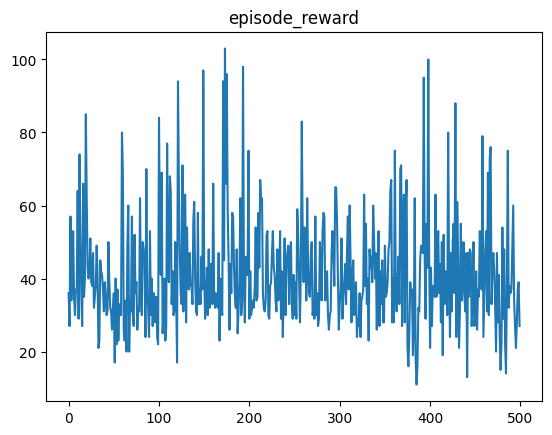

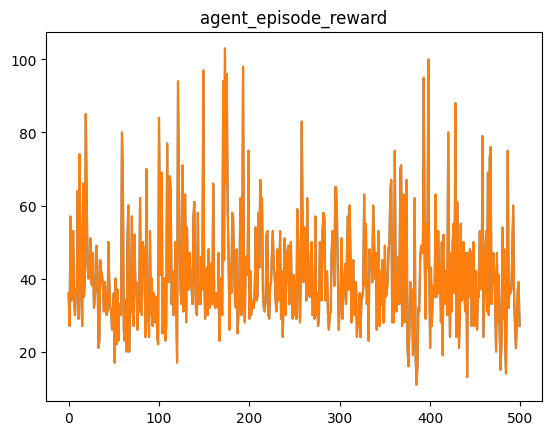

In [29]:
for k, data in metrics_history.items():
    plt.figure()
    plt.plot(data)
    plt.title(k)